**LSTM Based N-gram predictor**

In [0]:
import sys
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [0]:
from google.colab import drive
drive.mount('/gdrive')

import os

print(os.listdir('../gdrive/My Drive/NLP'))
os.chdir('../gdrive/My Drive/NLP/')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
['LSTM', 'weights-improvement-01-2.7840-bigger.hdf5', 'weights-improvement-02-2.4281-bigger.hdf5', 'weights-improvement-03-2.2310-bigger.hdf5', 'weights-improvement-04-2.0931-bigger.hdf5', 'weights-improvement-05-1.9941-bigger.hdf5', 'weights-improvement-06-1.9257-bigger.hdf5', 'weights-improvement-07-1.8625-bigger.hdf5', 'weights-improvement-08-1.8065-bigger.hdf5', 'weights-improvement-09-1.7622-bigger.hdf5', 'weights-improvement-10-1.7197-bigger.hdf5', 'weights-improvement-11-1.6830-bigger.hdf5', 'weights-improvement-12-1.6474-bigger.hdf5', 'weights-improvement-13-1.6155-bigger.hdf5', 'weights-improvement-14-1.5896-bigger.hdf5', 'weights-improvement-15-1.5638-bigger.hdf5', 'weights-improvement-16-1.5373-bigger.hdf5', 'weights-improvement-17-1.5143-bigger.hdf5', 'weights-improvement-18-1.4919-bigger.hdf5', 'weights-improvement-19-1.4732-bigger.hdf5', 'weights-improvement-

In [0]:
!pip install tensorflow-gpu==1.14

In [0]:
# load ascii text and covert to lowercase
filename = "LSTM/republic.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [0]:
# create mapping of unique chars to integers, and a reverse mapping
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [0]:
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  1214385
Total Vocab:  59


In [0]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 50
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)

In [0]:
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  1214335


In [0]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)

In [0]:
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=10000, callbacks=callbacks_list)

Train on 971468 samples, validate on 242867 samples
Epoch 1/50
971468/971468 [==============================] - 144s 148us/step - loss: 2.2014 - acc: 0.3683 - val_loss: 2.0988 - val_acc: 0.3963

Epoch 00001: loss improved from inf to 2.20144, saving model to weights-improvement-01-2.2014-bigger.hdf5
Epoch 2/50
971468/971468 [==============================] - 142s 146us/step - loss: 2.1405 - acc: 0.3849 - val_loss: 2.0744 - val_acc: 0.4019

Epoch 00002: loss improved from 2.20144 to 2.14049, saving model to weights-improvement-02-2.1405-bigger.hdf5
Epoch 3/50
971468/971468 [==============================] - 142s 146us/step - loss: 2.1191 - acc: 0.3910 - val_loss: 2.0646 - val_acc: 0.4081

Epoch 00003: loss improved from 2.14049 to 2.11907, saving model to weights-improvement-03-2.1191-bigger.hdf5
Epoch 4/50
971468/971468 [==============================] - 142s 146us/step - loss: 2.0970 - acc: 0.3972 - val_loss: 2.0456 - val_acc: 0.4152

Epoch 00004: loss improved from 2.11907 to 2.09695

In [0]:
import gc
gc.collect()

354

In [21]:
# serialize model to JSON
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

model_json = model.to_json()
with open("model_10000.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_1000.h5")
print("Saved model to disk")

Saved model to disk


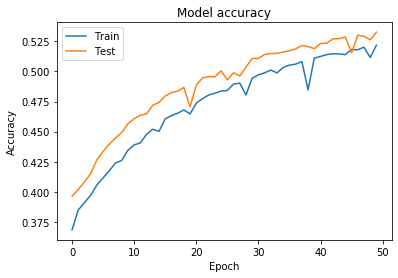

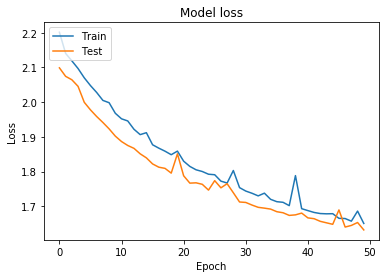

In [19]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# load the network weights
"""filename = "model_50.h5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')"""

In [0]:
model

In [0]:
# We will remove double quotes, !, ? $, #, etc
# specify to translate chars 
str1 = ""
# specify to replace with 
str2 = ""
# delete chars 
str3 = "\"!?#$%^&*+"

trg = raw_text
table = trg.maketrans(str1, str2, str3)
raw_text = trg.translate(table)

print(len(raw_text))


words = raw_text.split()
print (len(words))

words = [word.lower() for word in words]

import nltk
freq_dist = nltk.FreqDist(words)


from nltk.util import ngrams

esBigrams = ngrams(words, 2)


import collections
esBigramFreq = collections.Counter(esBigrams)


esTrigrams = ngrams(words, 3)
esTrigramFreq = collections.Counter(esTrigrams)

esTrigramFreq.most_common(10)

143582
26387


[(('the', 'mock', 'turtle'), 31),
 (('said', 'the', 'mock'), 19),
 (('she', 'said', 'to'), 17),
 (('one', 'of', 'the'), 15),
 (('the', 'march', 'hare'), 15),
 (('said', 'the', 'caterpillar.'), 12),
 (('out', 'of', 'the'), 11),
 (('the', 'white', 'rabbit'), 11),
 (('there', 'was', 'a'), 11),
 (('a', 'minute', 'or'), 11)]

In [0]:
esBigramFreq.most_common(10)

[(('said', 'the'), 207),
 (('of', 'the'), 128),
 (('in', 'a'), 97),
 (('in', 'the'), 78),
 (('and', 'the'), 77),
 (('to', 'the'), 69),
 (('as', 'she'), 60),
 (('at', 'the'), 60),
 (('she', 'had'), 57),
 (('it', 'was'), 55)]

In [0]:
esTrigramFreq.most_common(10)

[(('the', 'mock', 'turtle'), 31),
 (('said', 'the', 'mock'), 19),
 (('she', 'said', 'to'), 17),
 (('one', 'of', 'the'), 15),
 (('the', 'march', 'hare'), 15),
 (('said', 'the', 'caterpillar.'), 12),
 (('out', 'of', 'the'), 11),
 (('the', 'white', 'rabbit'), 11),
 (('there', 'was', 'a'), 11),
 (('a', 'minute', 'or'), 11)]

In [0]:
prev = [char_to_int[value] for value in "and "]
temp = [1]*15
temp[-len(prev):] = prev
patternX = temp

In [0]:
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in patternX]), "\"")
# generate characters
for i in range(6):
	x = numpy.reshape(patternX, (1, len(patternX), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in patternX]
	#print(result)
	sys.stdout.write(result)
	patternX.append(index)
	patternX = patternX[1:len(patternX)]
print ("\nDone.")

print ("\"", ''.join([int_to_char[value] for value in patternX]), "\"")

Seed:
"            and  "
      
Done.
"      and        "
